In [649]:
import pandas as pd

import logging
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [650]:
data=pd.read_csv('bbc.csv')
data

,Index,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business
...,...,...,...
2220,2220,Warning over Windows Word files\n \n Writing a...,tech
2221,2221,Fast lifts rise into record books\n \n Two hig...,tech
2222,2222,Nintendo adds media playing to DS\n \n Nintend...,tech
2223,2223,Fast moving phone viruses appear\n \n Security...,tech


In [651]:
data=data.sample(frac=1)
data

,Index,news,type
458,458,Christmas sales worst since 1981\n \n UK retai...,business
1128,1128,Cabinet anger at Brown cash raid\n \n Minister...,politics
1564,1564,Wales silent on Grand Slam talk\n \n Rhys Will...,sport
1034,1034,Schools to take part in mock poll\n \n Record ...,politics
2151,2151,BT offers free net phone calls\n \n BT is offe...,tech
...,...,...,...
513,513,Snicket tops US box office chart\n \n The film...,entertainment
278,278,US prepares for hybrid onslaught\n \n Sales of...,business
115,115,Lufthansa may sue over Bush visit\n \n German ...,business
538,538,Downloads enter US singles chart\n \n Digital ...,entertainment


<AxesSubplot:ylabel='type'>

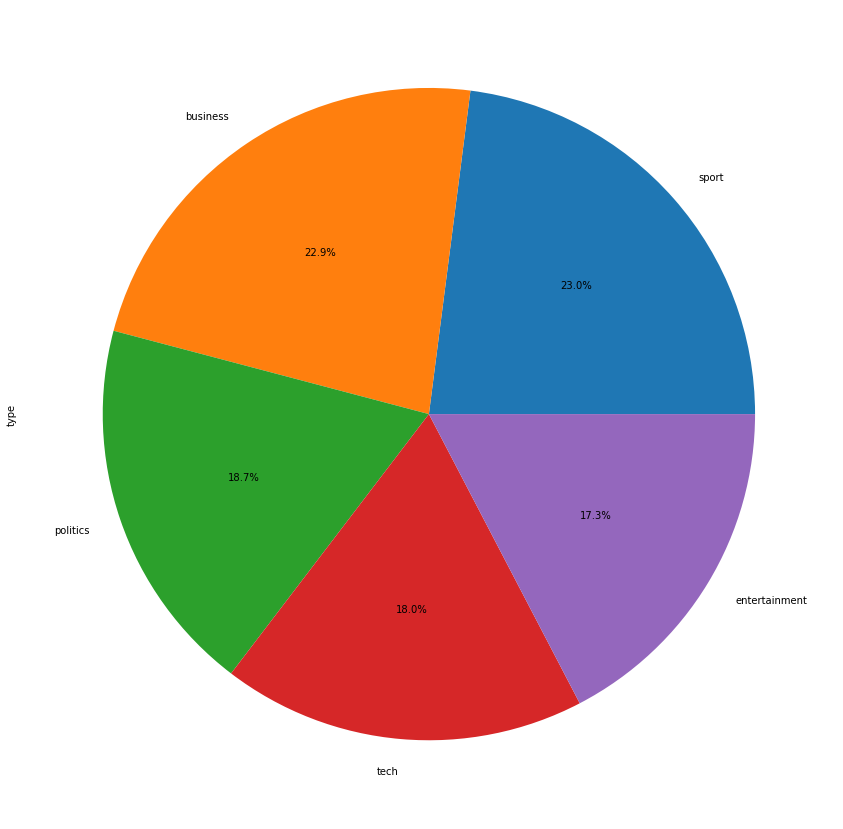

In [652]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15,15))
data['type'].value_counts().plot.pie( autopct = '%1.1f%%')

In [653]:
import re
from nltk.stem import PorterStemmer 

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    ps = PorterStemmer()
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text= ' '.join([ps.stem(word) for word in text.split()])
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [654]:
def print_plot(index):
    example = data[data.index == index][['news', 'type']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(0)

UK economy facing 'major risks'
 
 The UK manufacturing sector will continue to face "serious challenges" over the next two years, the British Chamber of Commerce (BCC) has said.
 
 The group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced "major risks" and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.
 
 Manufacturers' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.
 
 "Despite some positive news for the export sector, there are worrying signs for manufacturing," the BCC said. "These results reinforce our concern over the sector's persist

In [656]:
data['news'] = data['news'].apply(clean_text)
print_plot(0)

uk economi face major risk uk manufactur sector continu face seriou challeng next two year british chamber commerc bcc ha said group quarterli survey compani found export pick last three month 2004 best level eight year rise came despit exchang rate cite major concern howev bcc found whole uk economi still face major risk warn growth set slow recent forecast econom growth slow 3 2004 littl 25 2005 2006 manufactur domest sale growth fell back slightli quarter survey 5 196 firm found employ manufactur also fell job expect lowest level year despit posit news export sector worri sign manufactur bcc said result reinforc concern sector persist inabl sustain recoveri outlook servic sector wa uncertain despit increa export order quarter bcc note bcc found confid increa quarter across manufactur servic sector although fail reach level start 2004 reduc threat interest rate increa contribut improv confid said bank england rai interest rate five time novemb 2003 august last year rate kept hold sin

In [589]:
data['news'].apply(lambda x: len(x.split(' '))).sum()

518553

In [590]:
data['news'][0]

'uk economi face major risks uk manufactur sector continu face seriou challenges next two years british chamber commerc bcc ha said group quarterli survey compani found export pick last three month 2004 best level eight years rise came despit exchang rate cite major concern however bcc found whole uk economi still face major risks warn growth set slow recent forecast econom growth slow 3 2004 littl 25 2005 2006 manufacturers domest sale growth fell back slightli quarter survey 5 196 firm found employ manufactur also fell job expect lowest level year despit posit news export sector worri sign manufacturing bcc said result reinforc concern sector persist inabl sustain recovery outlook servic sector wa uncertain despit increas export order quarter bcc noted bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004 reduc threat interest rate increas contribut improv confidence said bank england rais interest rate five time novemb 2003 augu

In [591]:
X = data.news
y = data.type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [592]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=data.type.unique()))

accuracy 0.9550898203592815
               precision    recall  f1-score   support

     politics       0.92      0.96      0.94       132
entertainment       1.00      0.89      0.94       128
         tech       0.93      0.96      0.94       132
     business       0.98      0.99      0.99       153
        sport       0.95      0.96      0.96       123

     accuracy                           0.96       668
    macro avg       0.96      0.95      0.95       668
 weighted avg       0.96      0.96      0.96       668



# Logistic Regression

In [593]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [594]:


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=data['type'].unique()))

accuracy 0.9730538922155688
               precision    recall  f1-score   support

     politics       0.95      0.95      0.95       132
entertainment       1.00      0.97      0.98       128
         tech       0.95      0.97      0.96       132
     business       1.00      0.99      1.00       153
        sport       0.96      0.98      0.97       123

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



In [595]:
my_data=pd.read_csv('test_data.csv')
my_data
content=[]
label=[]
for i in range(len(my_data)):
    content.append(my_data['content'][i])
    label.append(my_data['category'][i])
# label

In [596]:
my_data['category'].unique()

array(['tech', 'entertainment', 'politics', 'sport', 'business'],
      dtype=object)

In [597]:

y_pred = logreg.predict(content)

print('accuracy %s' % accuracy_score(y_pred, label))
print(classification_report(label, y_pred,target_names=my_data['category'].unique()))

accuracy 0.558974358974359
               precision    recall  f1-score   support

         tech       0.03      1.00      0.07         2
entertainment       0.88      0.81      0.84        36
     politics       0.33      0.17      0.23        23
        sport       0.29      0.55      0.37        11
     business       0.97      0.55      0.70       123

     accuracy                           0.56       195
    macro avg       0.50      0.62      0.44       195
 weighted avg       0.83      0.56      0.65       195



In [598]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [599]:
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
# from gensim.models import Doc2Vec
# from sklearn import utils
# import gensim
# from gensim.models.doc2vec import TaggedDocument
# import re

# def label_sentences(corpus, label_type):
#     """
#     Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
#     We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
#     a dummy index of the post.
#     """
#     labeled = []
#     for i, v in enumerate(corpus):
#         label = label_type + '_' + str(i)
#         labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
#     return labeled

# def label_sentences(corpus, label_type):
#     """
#     Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
#     We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
#     a dummy index of the post.
#     """
#     labeled = []
#     for i, v in enumerate(corpus):
#         label = label_type + '_' + str(i)
#         labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
#     return labeled


# X_train, X_test, y_train, y_test = train_test_split(data.news, data.type, random_state=0, test_size=0.3)
# X_train = label_sentences(X_train, 'Train')
# X_test = label_sentences(X_test, 'Test')
# all_data = X_train + X_test

# model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
# model_dbow.build_vocab([x for x in tqdm(all_data)])

# for epoch in range(30):
#     model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
#     model_dbow.alpha -= 0.002
#     model_dbow.min_alpha = model_dbow.alpha

In [600]:
my_data=pd.read_csv('test_data.csv')
my_data
content=[]
label=[]
for i in range(len(my_data)):
    content.append(my_data['content'][i])
    label.append(my_data['category'][i])

In [601]:
text=[]
for cont in content:
    text.append(cont)
    
predictions = logreg.predict(text)
predictions

array(['tech', 'business', 'tech', 'tech', 'tech', 'business', 'tech',
       'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'business',
       'business', 'entertainment', 'business', 'tech', 'tech',
       'business', 'business', 'tech', 'business', 'tech', 'tech', 'tech',
       'politics', 'tech', 'business', 'business', 'business', 'business',
       'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech',
       'tech', 'business', 'tech', 'business', 'business', 'tech',
       'business', 'tech', 'politics', 'tech', 'business', 'tech',
       'business', 'tech', 'business', 'tech', 'tech', 'tech', 'business',
       'politics', 'business', 'tech', 'tech', 'tech', 'tech', 'tech',
       'business', 'business', 'tech', 'business', 'business', 'business',
       'tech', 'tech', 'politics', 'business', 'business', 'business',
       'business', 'business', 'tech', 'tech', 'tech', 'tech', 'business',
       'business', 'business', 'politics', 'tech', 'business', 'tech

In [602]:
df=[]
for cont in text:
    df.append(clean_text(cont))
df

['rip pepper robot softbank pauses product techrip pepper robot softbank pauses productionbi jane wakefieldtechnolog report published8 hour agosharecloseshar pagecopi linkabout sharingimag copyrightgetti imagesimag captionpepp wa one high profil robots make appear event around worldpepper friendli littl humanoid robot wa launch much fanfar back 2014 look may retir leastit maker japanes conglomer softbank confirm bbc product paus whileit would onli start make robot needed said firm also slash job global robot oper france accord reutersabout half 330 job go reportsimag copyrightgetti imagesimag captionaccord reuters onli 27 000 unit ever madepepp gain attent one first humanoid robot abl read emotions wa promot use home companion public places shop railway stationsbut despit high profil appear confer events never realli caught commerci product accord reuters onli 27 000 unit ever madethat wa due part 1 790 1 290 price tag 4ft 62lb robot wa mainli use research educ tool schools colleg univ

In [603]:
c=0
inc=0
for txt, predicted, actual in zip(df, predictions,label):
    print('"{}\n"'.format(txt))
    print("  - Predicted as: '{}\n----------------------------\n'".format(predicted))
    print("")
    if(predicted==actual):
        c+=1
    else:
        inc+=1
        
print(c)
print(inc)

"rip pepper robot softbank pauses product techrip pepper robot softbank pauses productionbi jane wakefieldtechnolog report published8 hour agosharecloseshar pagecopi linkabout sharingimag copyrightgetti imagesimag captionpepp wa one high profil robots make appear event around worldpepper friendli littl humanoid robot wa launch much fanfar back 2014 look may retir leastit maker japanes conglomer softbank confirm bbc product paus whileit would onli start make robot needed said firm also slash job global robot oper france accord reutersabout half 330 job go reportsimag copyrightgetti imagesimag captionaccord reuters onli 27 000 unit ever madepepp gain attent one first humanoid robot abl read emotions wa promot use home companion public places shop railway stationsbut despit high profil appear confer events never realli caught commerci product accord reuters onli 27 000 unit ever madethat wa due part 1 790 1 290 price tag 4ft 62lb robot wa mainli use research educ tool schools colleg unive

In [604]:
t=0
for txt, predicted in zip(df, predictions):
    print('"{}\n"'.format(txt))
    print("  - Predicted as: '{}\n----------------------------\n'".format(predicted))
    print("")


"rip pepper robot softbank pauses product techrip pepper robot softbank pauses productionbi jane wakefieldtechnolog report published8 hour agosharecloseshar pagecopi linkabout sharingimag copyrightgetti imagesimag captionpepp wa one high profil robots make appear event around worldpepper friendli littl humanoid robot wa launch much fanfar back 2014 look may retir leastit maker japanes conglomer softbank confirm bbc product paus whileit would onli start make robot needed said firm also slash job global robot oper france accord reutersabout half 330 job go reportsimag copyrightgetti imagesimag captionaccord reuters onli 27 000 unit ever madepepp gain attent one first humanoid robot abl read emotions wa promot use home companion public places shop railway stationsbut despit high profil appear confer events never realli caught commerci product accord reuters onli 27 000 unit ever madethat wa due part 1 790 1 290 price tag 4ft 62lb robot wa mainli use research educ tool schools colleg unive

# svm

In [605]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=data.type.unique()))

accuracy 0.9760479041916168
               precision    recall  f1-score   support

     politics       0.95      0.95      0.95       132
entertainment       1.00      0.98      0.99       128
         tech       0.96      0.97      0.97       132
     business       1.00      0.99      1.00       153
        sport       0.96      0.98      0.97       123

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



In [606]:

y_pred = sgd.predict(content)

print('accuracy %s' % accuracy_score(y_pred, label))
print(classification_report(label, y_pred,target_names=my_data['category'].unique()))

accuracy 0.5846153846153846
               precision    recall  f1-score   support

         tech       0.04      1.00      0.07         2
entertainment       0.85      0.81      0.83        36
     politics       0.12      0.04      0.06        23
        sport       0.29      0.64      0.40        11
     business       0.97      0.61      0.75       123

     accuracy                           0.58       195
    macro avg       0.46      0.62      0.42       195
 weighted avg       0.80      0.58      0.66       195



In [607]:
text=[]
for cont in content:
    text.append(cont)
    
predictions = sgd.predict(text)
predictions

array(['tech', 'business', 'tech', 'tech', 'tech', 'business', 'tech',
       'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'business',
       'entertainment', 'entertainment', 'business', 'business', 'tech',
       'business', 'business', 'tech', 'business', 'tech', 'tech', 'tech',
       'politics', 'tech', 'business', 'business', 'business', 'business',
       'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech',
       'tech', 'business', 'tech', 'business', 'tech', 'tech', 'business',
       'tech', 'politics', 'tech', 'business', 'tech', 'business', 'tech',
       'tech', 'tech', 'tech', 'tech', 'business', 'politics', 'business',
       'tech', 'tech', 'tech', 'tech', 'tech', 'business', 'business',
       'tech', 'tech', 'business', 'business', 'tech', 'tech', 'tech',
       'business', 'business', 'tech', 'business', 'business', 'tech',
       'tech', 'tech', 'tech', 'business', 'business', 'business',
       'politics', 'tech', 'business', 'tech', 'tech', 

In [608]:
df=[]
for cont in text:
    df.append(clean_text(cont))
df

['rip pepper robot softbank pauses product techrip pepper robot softbank pauses productionbi jane wakefieldtechnolog report published8 hour agosharecloseshar pagecopi linkabout sharingimag copyrightgetti imagesimag captionpepp wa one high profil robots make appear event around worldpepper friendli littl humanoid robot wa launch much fanfar back 2014 look may retir leastit maker japanes conglomer softbank confirm bbc product paus whileit would onli start make robot needed said firm also slash job global robot oper france accord reutersabout half 330 job go reportsimag copyrightgetti imagesimag captionaccord reuters onli 27 000 unit ever madepepp gain attent one first humanoid robot abl read emotions wa promot use home companion public places shop railway stationsbut despit high profil appear confer events never realli caught commerci product accord reuters onli 27 000 unit ever madethat wa due part 1 790 1 290 price tag 4ft 62lb robot wa mainli use research educ tool schools colleg univ

In [612]:
t=0
for txt, predicted in zip(df, predictions):
    print('"{}\n"'.format(txt))
    print("  - Predicted as: '{}\n----------------------------\n'".format(predicted))
    print("")
    if(predicted=='tech'):
        t+=1
t

"rip pepper robot softbank pauses product techrip pepper robot softbank pauses productionbi jane wakefieldtechnolog report published8 hour agosharecloseshar pagecopi linkabout sharingimag copyrightgetti imagesimag captionpepp wa one high profil robots make appear event around worldpepper friendli littl humanoid robot wa launch much fanfar back 2014 look may retir leastit maker japanes conglomer softbank confirm bbc product paus whileit would onli start make robot needed said firm also slash job global robot oper france accord reutersabout half 330 job go reportsimag copyrightgetti imagesimag captionaccord reuters onli 27 000 unit ever madepepp gain attent one first humanoid robot abl read emotions wa promot use home companion public places shop railway stationsbut despit high profil appear confer events never realli caught commerci product accord reuters onli 27 000 unit ever madethat wa due part 1 790 1 290 price tag 4ft 62lb robot wa mainli use research educ tool schools colleg unive

77

In [610]:
c=0
inc=0
for txt, predicted, actual in zip(df, predictions,label):
    print('"{}\n"'.format(txt))
    print("  - Predicted as: '{}\n----------------------------\n'".format(predicted))
    print("")
    if(predicted==actual):
        c+=1
    else:
        inc+=1
        
print(c)
print(inc)

"rip pepper robot softbank pauses product techrip pepper robot softbank pauses productionbi jane wakefieldtechnolog report published8 hour agosharecloseshar pagecopi linkabout sharingimag copyrightgetti imagesimag captionpepp wa one high profil robots make appear event around worldpepper friendli littl humanoid robot wa launch much fanfar back 2014 look may retir leastit maker japanes conglomer softbank confirm bbc product paus whileit would onli start make robot needed said firm also slash job global robot oper france accord reutersabout half 330 job go reportsimag copyrightgetti imagesimag captionaccord reuters onli 27 000 unit ever madepepp gain attent one first humanoid robot abl read emotions wa promot use home companion public places shop railway stationsbut despit high profil appear confer events never realli caught commerci product accord reuters onli 27 000 unit ever madethat wa due part 1 790 1 290 price tag 4ft 62lb robot wa mainli use research educ tool schools colleg unive

# Deep Learning Method

In [58]:
pip install tensorflow

     |████████████████████████████████| 454.4 MB 74 kB/s  eta 0:00:01     |████████▉                       | 124.8 MB 51 kB/s eta 1:46:48     |█████████████████▊              | 251.3 MB 632 kB/s eta 0:05:22     |███████████████████▋            | 277.9 MB 76 kB/s eta 0:38:15     |████████████████████▌           | 291.0 MB 558 kB/s eta 0:04:53��██████████████▏   | 400.0 MB 29 kB/s eta 0:30:52
     |████████████████████████████████| 4.4 MB 66 kB/s eta 0:00:012
     |████████████████████████████████| 57 kB 367 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 437 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 587 kB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 290 kB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 554 kB/s eta 0:00:01
     |████████████████████████████████| 132 kB 476 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 270 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 906 kB/s eta 0:00

In [611]:
# X_train, X_test, y_train, y_test = train_test_split(data.news, data.type, random_state=0, test_size=0.3)
# data=pd.read_csv('bbc.csv')

In [11]:
# X = data.news
# y = data.type
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# y.unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [619]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras.utils import np_utils

train_size = int(len(data) * .8)
train_posts = data['news'][:train_size]
train_tags = data['type'][:train_size]

test_posts = data['news'][train_size:]
test_tags = data['type'][train_size:]

max_words = 2000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

batch_size = 64
epochs = 5

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

# my_data=pd.read_csv('test_data.csv')
# my_data['content'] = my_data['content'].apply(clean_text)
# x_mytest=tokenize.texts_to_matrix(my_data['content'][0:len(my_data)])
# y_mytest = encoder.transform(my_data['category'][0:len(my_data)])
# y_mytest=np_utils.to_categorical(y_mytest, 5)

# score = model.evaluate(x_mytest, y_mytest,
#                        batch_size=batch_size, verbose=1)
# print('Test accuracy:', score[1])

Epoch 1/5
26/26 [==============================] - 1s 10ms/step - loss: 1.0025 - accuracy: 0.6644 - val_loss: 0.1337 - val_accuracy: 0.9888
Epoch 2/5
26/26 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9860 - val_loss: 0.0789 - val_accuracy: 0.9888
Epoch 3/5
26/26 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9969 - val_loss: 0.0516 - val_accuracy: 0.9831
Epoch 4/5
26/26 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9944
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.8051
Test accuracy: 0.8051282167434692


In [620]:
my_data=pd.read_csv('test_data.csv')
my_data['content'] = my_data['content'].apply(clean_text)
x_mytest=tokenize.texts_to_matrix(my_data['content'][0:len(my_data)])
y_mytest = encoder.transform(my_data['category'][0:len(my_data)])
y_mytest=np_utils.to_categorical(y_mytest, 5)
# print(y_mytest)

In [638]:
annot={4:'tech',1:'entertainment',2:'politics',3:'sport',0:'business'}

In [622]:
score = model.evaluate(x_mytest, y_mytest,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.8051
Test accuracy: 0.8051282167434692


In [623]:
y_pred = model.predict(x_mytest)
pred_value = tf.argmax(y_pred,axis =1).numpy()  
pred_value
actual_val=tf.argmax(y_mytest,axis=1).numpy()
actual_val
# print(np.asarray(y_pred))
# print('-----'*20)
# print(np.asarray(y_pred))
print(classification_report(pred_value,actual_val,target_names=my_data['category'].unique()))

               precision    recall  f1-score   support

         tech       1.00      0.14      0.25        14
entertainment       0.83      0.83      0.83        36
     politics       0.57      0.68      0.62        19
        sport       0.55      0.43      0.48        14
     business       0.86      0.95      0.90       112

     accuracy                           0.81       195
    macro avg       0.76      0.61      0.62       195
 weighted avg       0.81      0.81      0.78       195



In [624]:
result= [ list(x) for x in model.predict(x_mytest)]
actual= [ list(x) for x in y_mytest]
# print(result)
cor=0
incor=0
for res,act in zip(result,actual):
    print(annot[res.index(max(res))],annot[act.index(max(act))])
    if(annot[res.index(max(res))]==annot[act.index(max(act))]):
        cor+=1
    else:
        incor+=1
        
print("Correct",cor)
print("Incorrect",incor)

tech tech
politics tech
tech tech
tech tech
tech tech
business tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
business tech
entertainment tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
business tech
tech tech
tech tech
politics tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
business tech
tech tech
tech tech
business tech
tech tech
politics tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
business tech
tech tech
tech tech
tech tech
tech tech
tech tech
sport tech
tech tech
tech tech
tech tech
business tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
business tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech tech
tech t

In [625]:
actual= [ list(x) for x in y_mytest]
for i in actual:
    print(annot[i.index(max(i))])

tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
tech
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
entertainment
politics
politics
politics
sport
sp

In [657]:
news_input=input()
news_input=clean_text(news_input)
print(news_input)
news_input=tokenize.texts_to_matrix(list(news_input))
res=model.predict(news_input)
res = tf.argmax(res,axis =1).numpy() 
res=res.tolist()
# res
print(annot[res.index(max(res))])

week tens negoti democrat republican leaders congress reach compromis wednesday investig event jan 9 attack capitol wa notori day american histori still mani question whi wer pleas announc format jan 9 commission day pretti close said senat major leader chuck schumer confirm lawmak reach bipartisan agreement creat independ committe examin lawmakers rhetor exactli happen jan 9 thank republican agre import investig least one day january report custodi staff wax floor day street surveil footag show wa taco truck long line park around corner might gotten everyth want thi agreement spirit bipartisanship aliv well press time schumer ad commiss would also investig threat made social media could tie capitol bathroom sink began leak jan 9
week ten negoti democrat republican leader congress reach compromi wednesday investig event jan 9 attack capitol wa notori day american histori still mani question whi wer plea announc format jan 9 commiss day pretti close said senat major leader chuck schumer

# DL model 2

In [640]:
data=pd.read_csv('bbc.csv')

In [641]:
data=data.sample(frac=1)
data

,Index,news,type
725,725,Rock band U2 break ticket record\n \n U2 have ...,entertainment
1914,1914,Robotic pods take on car design\n \n A new bre...,tech
419,419,News Corp eyes video games market\n \n News Co...,business
623,623,Potter director signs Warner deal\n \n Harry P...,entertainment
258,258,Pension hitch for long-living men\n \n Male li...,business
...,...,...,...
2091,2091,Learning to love broadband\n \n We are reachin...,tech
1042,1042,Tories pledge free sports lessons\n \n Childre...,politics
98,98,German jobless rate at new record\n \n More th...,business
2026,2026,Man auctions ad space on forehead\n \n A 20-ye...,tech


In [642]:
import re
from nltk.stem.wordnet import WordNetLemmatizer

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    ps = WordNetLemmatizer()
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text= ' '.join([ps.lemmatize(word) for word in text.split()])
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [643]:
data['news'] = data['news'].apply(clean_text)
print_plot(0)

uk economy facing major risks uk manufacturing sector continue face serious challenges next two years british chamber commerce bcc ha said groups quarterly survey company found export picked last three month 2004 best level eight years rise came despite exchange rate cited major concern however bcc found whole uk economy still faced major risks warned growth set slow recently forecast economic growth slow 3 2004 little 25 2005 2006 manufacturers domestic sale growth fell back slightly quarter survey 5 196 firm found employment manufacturing also fell job expectation lowest level year despite positive news export sector worrying sign manufacturing bcc said result reinforce concern sectors persistent inability sustain recovery outlook service sector wa uncertain despite increase export order quarter bcc noted bcc found confidence increased quarter across manufacturing service sector although overall failed reach level start 2004 reduced threat interest rate increase contributed improved 

In [644]:
def tf_idf(all_news):
    freq = pd.Series(' '.join(data['news']).split()).value_counts()
    freq2 = freq[freq <= 3]
    freq3 = list(freq2.index.values)
    data['news'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))
    return data

In [645]:
data['news']= data['news'].apply(tf_idf)

In [646]:
data['news'][0]

RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded in comparison

In [472]:
# nltk.download('wordnet')

In [497]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras.utils import np_utils

train_size = int(len(data) * .8)
train_posts = data['news'][:train_size]
train_tags = data['type'][:train_size]

test_posts = data['news'][train_size:]
test_tags = data['type'][train_size:]

max_words = 5000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

batch_size = 64
epochs = 8

# Build the model
model2 = Sequential()
model2.add(Dense(512, input_shape=(max_words,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
# model2.add(LSTM(300, dropout=0.2))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
              
history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


my_data=pd.read_csv('test_data.csv')
my_data['content'] = my_data['content'].apply(clean_text)
x_mytest=tokenize.texts_to_matrix(my_data['content'][0:len(my_data)])
y_mytest = encoder.transform(my_data['category'][0:len(my_data)])
y_mytest=np_utils.to_categorical(y_mytest, 5)
""
score = model2.evaluate(x_mytest, y_mytest,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/8
26/26 [==============================] - 1s 25ms/step - loss: 0.8596 - accuracy: 0.6832 - val_loss: 0.1690 - val_accuracy: 0.9382
Epoch 2/8
26/26 [==============================] - 1s 19ms/step - loss: 0.0663 - accuracy: 0.9834 - val_loss: 0.0448 - val_accuracy: 0.9775
Epoch 3/8
26/26 [==============================] - 0s 19ms/step - loss: 0.0225 - accuracy: 0.9940 - val_loss: 0.0443 - val_accuracy: 0.9888
Epoch 4/8
26/26 [==============================] - 0s 19ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.0573 - val_accuracy: 0.9831
Epoch 5/8
26/26 [==============================] - 1s 20ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0842 - val_accuracy: 0.9888
Epoch 6/8
26/26 [==============================] - 1s 19ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0695 - val_accuracy: 0.9888
Epoch 7/8
26/26 [==============================] - 1s 20ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0564 - val_accuracy: 0.9944
Epoch 8/8
4/4 [=====

# RNN

In [565]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

ImportError: cannot import name 'RMSprop' from 'keras.optimizers' (/home/aaditya/anaconda3/lib/python3.8/site-packages/keras/optimizers.py)